<a href="https://colab.research.google.com/github/cristina-ramos/INFO/blob/main/Assignments/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycountry

In [ ]:
!pip install pycountry_convert

In [ ]:
import pandas as pd
import numpy as np
import pycountry
import pycountry_convert as pc
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext google.colab.data_table
from IPython.display import Javascript
display(Javascript("google.colab.output.resizeIframeToContent()"))
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data = pd.read_excel('/content/indicator hiv estimated prevalence.xlsx')
data.drop(data.iloc[:, 1:22], axis=1, inplace=True)
data = data.rename({'Estimated HIV Prevalence% - (Ages 15-49)' : 'name'}, axis=1)

In [ ]:
def fuzzy(country):
  try:
    result = pycountry.countries.search_fuzzy(country)
    return result[0].alpha_2
  except:
    return np.nan

data['code'] = data['name'].apply(lambda country: fuzzy(country))

def cont(code):
  try:
    result = pc.country_alpha2_to_continent_code(code)
    return result
  except:
    return np.nan

data['continent'] = data['code'].apply(lambda code: cont(code))

In [ ]:
data

,name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,code,continent
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GE,AS
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06,AF,AS
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL,EU
4,Algeria,0.06,0.06,0.06,0.06,0.1,0.1,0.1,0.1,0.1,NaN,NaN,NaN,DZ,AF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Bonaire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BQ,NA
271,Sark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,Chinese Taipei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,Saint Eustatius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.options.mode.use_inf_as_na = True

In [ ]:
data = data[data['continent'].notna()]

In [ ]:
data

,name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,code,continent
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GE,AS
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06,AF,AS
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL,EU
4,Algeria,0.06,0.06,0.06,0.06,0.1,0.1,0.1,0.1,0.1,NaN,NaN,NaN,DZ,AF
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AS,OC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.10,SS,AF
262,Curaçao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NL,EU
266,"Virgin Islands, British",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VG,NA
270,Bonaire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BQ,NA


In [ ]:
data.to_csv('/content/sample_data/HIV_Data.csv')

In [ ]:
data['avg'] = data.mean(axis=1).round(3)
data = data[data['avg'].notna()]
sorted = data.sort_values(by=['continent', 'avg'], ascending=False)
sorted.drop(sorted.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]], axis=1, inplace=True)
sorted

,name,continent,avg
94,Guyana,SA,1.208
215,Suriname,SA,1.033
47,Colombia,SA,0.658
246,Venezuela,SA,0.500
241,Uruguay,SA,0.492
...,...,...,...
151,Morocco,AF,0.108
4,Algeria,AF,0.082
48,Comoros,AF,0.070
65,Egypt,AF,0.060


In [ ]:
grouped = sorted.groupby('continent')
grouped_high = grouped.first()
grouped_low = grouped.last()
grouped_low

,name,avg
continent,,
AF,Tunisia,0.060
AS,Turkey,0.060
EU,Slovak Republic,0.060
NA,Cuba,0.103
OC,Fiji,0.083
SA,Bolivia,0.225


In [ ]:
grouped_high

,name,avg
continent,,
AF,Botswana,25.208
AS,Thailand,1.450
EU,Estonia,1.008
NA,Bahamas,3.000
OC,Papua New Guinea,0.700
SA,Guyana,1.208


Text(0, 0.5, 'Continent')

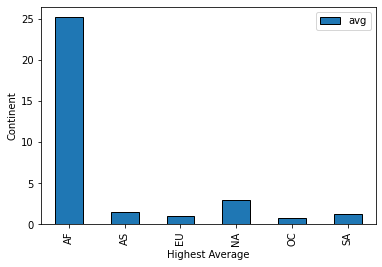

In [ ]:
grouped_high.plot(kind='bar')
plt.xlabel('Highest Average')
plt.ylabel('Continent')

Text(0, 0.5, 'Continent')

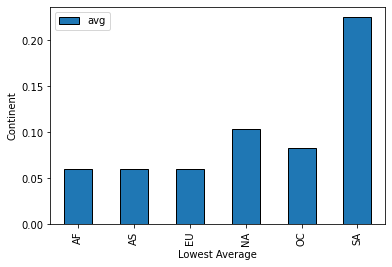

In [ ]:
grouped_low.plot(kind='bar')
plt.xlabel('Lowest Average')
plt.ylabel('Continent')

In [ ]:
merged_group = pd.merge(grouped_high, grouped_low, on=['continent'])
merged_group

,name_x,avg_x,name_y,avg_y
continent,,,,
AF,Botswana,25.208,Tunisia,0.060
AS,Thailand,1.450,Turkey,0.060
EU,Estonia,1.008,Slovak Republic,0.060
NA,Bahamas,3.000,Cuba,0.103
OC,Papua New Guinea,0.700,Fiji,0.083
SA,Guyana,1.208,Bolivia,0.225


Text(0, 0.5, 'Continent')

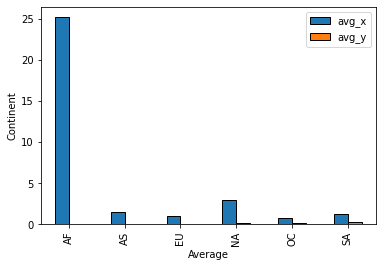

In [ ]:
merged_group.plot(kind='bar')
plt.xlabel('Average')
plt.ylabel('Continent')

In [ ]:
sorted.reset_index()
alt_countries = sorted.iloc[[6, 13, 20, 37, 73, 105]]
alt_countries.columns = ['country', 'continent', 'alt_avg']
merged_altgroup = pd.merge(merged_group, alt_countries, on=['continent'])
merged_altgroup = merged_altgroup.set_index(['country'])
merged_altgroup.columns = ['continent', 'high_country', 'high_avg', 'low_country', 'low_avg', 'alt_avg']
merged_altgroup

,continent,high_country,high_avg,low_country,low_avg,alt_avg
country,,,,,,
South Africa,AF,Botswana,25.208,Tunisia,0.060,17.575
Vietnam,AS,Thailand,1.450,Turkey,0.060,0.375
Portugal,EU,Estonia,1.008,Slovak Republic,0.060,0.542
Trinidad and Tobago,NA,Bahamas,3.000,Cuba,0.103,1.358
Australia,OC,Papua New Guinea,0.700,Fiji,0.083,0.125
Ecuador,SA,Guyana,1.208,Bolivia,0.225,0.433


,continent,high_country,high_avg,low_country,low_avg,alt_avg
country,,,,,,
South Africa,AF,Botswana,25.208,Tunisia,0.060,17.575
Vietnam,AS,Thailand,1.450,Turkey,0.060,0.375
Portugal,EU,Estonia,1.008,Slovak Republic,0.060,0.542
Trinidad and Tobago,NA,Bahamas,3.000,Cuba,0.103,1.358
Australia,OC,Papua New Guinea,0.700,Fiji,0.083,0.125
Ecuador,SA,Guyana,1.208,Bolivia,0.225,0.433


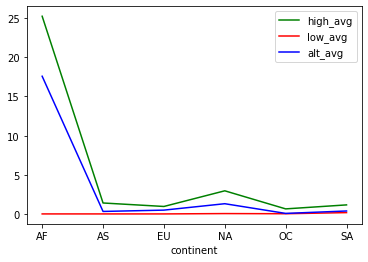

In [ ]:
axis = plt.gca()
merged_altgroup.plot(kind='line', x='continent', y='high_avg', color='green', ax=axis)
merged_altgroup.plot(kind='line', x='continent', y='low_avg', color='red', ax=axis)
merged_altgroup.plot(kind='line', x='continent', y='alt_avg', color='blue', ax=axis)
merged_altgroup

In [ ]:
display(Javascript("google.colab.output.resizeIframeToContent()"))
data = pd.read_excel('/content/indicator hiv estimated prevalence.xlsx')
data = data.rename({'Estimated HIV Prevalence% - (Ages 15-49)' : 'name'}, axis=1)
def fuzzy(country):
  try:
    result = pycountry.countries.search_fuzzy(country)
    return result[0].alpha_2
  except:
    return np.nan

data['code'] = data['name'].apply(lambda country: fuzzy(country))

def cont(code):
  try:
    result = pc.country_alpha2_to_continent_code(code)
    return result
  except:
    return np.nan

data['continent'] = data['code'].apply(lambda code: cont(code))
data

<IPython.core.display.Javascript object>

,name,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,code,continent
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GE,AS
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06,AF,AS
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL,EU
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.1,0.1,0.1,0.1,0.1,NaN,NaN,NaN,DZ,AF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Bonaire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BQ,NA
271,Sark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,Chinese Taipei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,Saint Eustatius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data[data['continent'].notna()]
data

,name,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,code,continent
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GE,AS
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06,AF,AS
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL,EU
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.1,0.1,0.1,0.1,0.1,NaN,NaN,NaN,DZ,AF
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AS,OC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.10,SS,AF
262,Curaçao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NL,EU
266,"Virgin Islands, British",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VG,NA
270,Bonaire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BQ,NA


In [ ]:
sorted_year = data.sort_values(by=['continent'], ascending=False)
sorted_year.drop(sorted_year.columns[[34]], axis=1, inplace=True)
sorted_year

,name,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,continent
26,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.10,0.20,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.20,0.3,0.3,0.3,SA
10,Argentina,0.020508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,0.30,0.30,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.50,0.4,0.4,0.4,SA
176,Peru,0.010679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.40,0.40,0.50,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.4,0.4,0.4,0.40,0.4,0.4,0.4,SA
175,Paraguay,NaN,NaN,NaN,NaN,0.009743,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.10,0.20,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.30,0.3,0.3,0.3,SA
29,Brazil,0.094479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.45,0.45,0.45,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.45,0.3,0.3,0.3,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Sudan,0.062391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.10,0.10,0.1,0.1,0.2,0.2,0.2,0.3,0.3,0.3,0.4,0.4,0.5,0.6,0.6,0.7,0.8,1.00,0.4,0.4,0.4,AF
80,Gambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.10,0.10,0.2,0.2,0.2,0.3,0.3,0.4,0.4,0.5,0.6,0.7,0.8,1.0,1.1,1.3,1.5,1.70,1.4,1.4,1.5,AF
79,Gabon,0.042124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.90,1.20,1.60,2.0,2.6,3.1,3.7,4.2,4.6,4.9,5.2,5.3,5.4,5.4,5.4,5.4,5.4,5.3,5.30,5.2,5.1,5.0,AF
71,Ethiopia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7,1.6,1.4,AF


In [ ]:
prev_year = sorted_year.groupby('continent').sum()
prev_year

,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AF,0.908566,0.027846,0.033554,0.012575,0.023823,0.022955,0.021896,0.000000,0.010400,0.0,0.0,85.52,105.16,127.10,150.60,173.60,194.80,212.34,225.54,234.14,239.24,240.94,240.84,238.44,234.94,230.58,226.38,221.98,218.48,215.38,210.92,208.62,209.52
AS,0.024335,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.010175,0.0,0.0,3.60,4.64,5.28,5.96,6.46,6.80,6.80,6.94,7.28,7.18,7.18,7.12,6.82,6.88,6.95,6.83,6.77,6.82,6.90,7.19,7.08,7.34
EU,0.085481,0.000000,0.025896,0.074633,0.063401,0.000000,0.064023,0.000000,0.000000,0.0,0.0,3.46,3.64,3.96,4.22,4.50,4.70,4.86,5.40,5.90,6.24,6.78,7.38,7.82,8.62,8.86,9.26,9.46,9.70,9.80,9.74,9.98,9.98
NA,0.396281,0.000000,0.000000,0.010653,0.000000,0.000000,0.012270,0.009510,0.000000,0.0,0.0,10.84,12.24,13.78,15.42,16.82,17.72,17.72,17.96,17.96,17.76,17.86,17.66,17.46,17.46,17.50,17.60,17.70,17.50,17.90,16.00,15.90,15.80
OC,0.000000,0.000000,0.000000,0.000000,0.012683,0.000000,0.000000,0.011372,0.010175,0.0,0.0,0.32,0.32,0.32,0.32,0.32,0.32,0.36,0.46,0.46,0.56,0.66,0.76,0.86,1.00,1.00,1.10,1.10,1.20,1.20,1.06,1.06,1.10
SA,0.179189,0.011931,0.000000,0.000000,0.009743,0.012153,0.009689,0.000000,0.000000,0.0,0.0,4.87,5.11,5.45,5.70,5.80,5.90,6.10,6.00,6.20,6.20,6.20,6.20,6.10,6.20,5.90,5.80,5.70,5.60,5.85,6.60,6.40,6.30


In [ ]:
counts = sorted_year.groupby('continent')['name'].count()
avg_year = np.round((prev_year.divide(counts, axis=0)), 2)
avg_year

,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AF,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.68,2.06,2.49,2.95,3.40,3.82,4.16,4.42,4.59,4.69,4.72,4.72,4.68,4.61,4.52,4.44,4.35,4.28,4.22,4.14,4.09,4.11
AS,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08,0.10,0.11,0.13,0.14,0.14,0.14,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.14,0.15,0.15,0.15,0.15,0.16
EU,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.07,0.08,0.08,0.09,0.09,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.17,0.17,0.18,0.18,0.19,0.19,0.19,0.19,0.19
NA,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.33,0.37,0.42,0.47,0.51,0.54,0.54,0.54,0.54,0.54,0.54,0.54,0.53,0.53,0.53,0.53,0.54,0.53,0.54,0.48,0.48,0.48
OC,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.03,0.03,0.03,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
SA,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.37,0.39,0.42,0.44,0.45,0.45,0.47,0.46,0.48,0.48,0.48,0.48,0.47,0.48,0.45,0.45,0.44,0.43,0.45,0.51,0.49,0.48


In [ ]:
avg_year = avg_year.reset_index()
unpivot = avg_year.melt(id_vars=['continent'], var_name='year', value_name='average')
unpivot

,continent,year,average
0,AF,1979,0.02
1,AS,1979,0.00
2,EU,1979,0.00
3,NA,1979,0.01
4,OC,1979,0.00
...,...,...,...
193,AS,2011,0.16
194,EU,2011,0.19
195,NA,2011,0.48
196,OC,2011,0.05


In [ ]:
pivot = pd.pivot_table(unpivot, values='average', index=['year'], columns='continent')
pivot

continent,AF,AS,EU,NA,OC,SA
year,,,,,,
1979,0.02,0.00,0.00,0.01,0.00,0.01
1980,0.00,0.00,0.00,0.00,0.00,0.00
1981,0.00,0.00,0.00,0.00,0.00,0.00
1982,0.00,0.00,0.00,0.00,0.00,0.00
1983,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.00,0.00,0.00,0.00,0.00,0.00
1986,0.00,0.00,0.00,0.00,0.00,0.00
1987,0.00,0.00,0.00,0.00,0.00,0.00


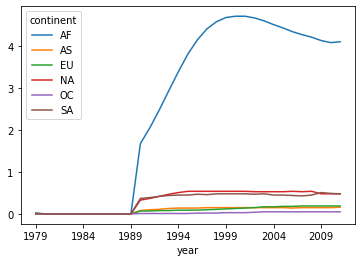

In [ ]:
lines = pivot.plot.line()
lines

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e1dc06050>,
      dtype=object)

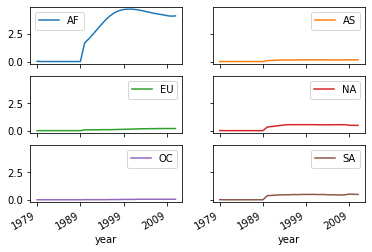

In [ ]:
axes = pivot.plot.line(subplots=True, layout=(3, -1), sharex=True, sharey=True)
axes

In [ ]:
prev_year

,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AF,0.908566,0.027846,0.033554,0.012575,0.023823,0.022955,0.021896,0.000000,0.010400,0.0,0.0,85.52,105.16,127.10,150.60,173.60,194.80,212.34,225.54,234.14,239.24,240.94,240.84,238.44,234.94,230.58,226.38,221.98,218.48,215.38,210.92,208.62,209.52
AS,0.024335,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.010175,0.0,0.0,3.60,4.64,5.28,5.96,6.46,6.80,6.80,6.94,7.28,7.18,7.18,7.12,6.82,6.88,6.95,6.83,6.77,6.82,6.90,7.19,7.08,7.34
EU,0.085481,0.000000,0.025896,0.074633,0.063401,0.000000,0.064023,0.000000,0.000000,0.0,0.0,3.46,3.64,3.96,4.22,4.50,4.70,4.86,5.40,5.90,6.24,6.78,7.38,7.82,8.62,8.86,9.26,9.46,9.70,9.80,9.74,9.98,9.98
NA,0.396281,0.000000,0.000000,0.010653,0.000000,0.000000,0.012270,0.009510,0.000000,0.0,0.0,10.84,12.24,13.78,15.42,16.82,17.72,17.72,17.96,17.96,17.76,17.86,17.66,17.46,17.46,17.50,17.60,17.70,17.50,17.90,16.00,15.90,15.80
OC,0.000000,0.000000,0.000000,0.000000,0.012683,0.000000,0.000000,0.011372,0.010175,0.0,0.0,0.32,0.32,0.32,0.32,0.32,0.32,0.36,0.46,0.46,0.56,0.66,0.76,0.86,1.00,1.00,1.10,1.10,1.20,1.20,1.06,1.06,1.10
SA,0.179189,0.011931,0.000000,0.000000,0.009743,0.012153,0.009689,0.000000,0.000000,0.0,0.0,4.87,5.11,5.45,5.70,5.80,5.90,6.10,6.00,6.20,6.20,6.20,6.20,6.10,6.20,5.90,5.80,5.70,5.60,5.85,6.60,6.40,6.30


In [ ]:
avg_year = np.round((prev_year.divide(counts, axis=0)), 2)
avg_year

,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AF,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.68,2.06,2.49,2.95,3.40,3.82,4.16,4.42,4.59,4.69,4.72,4.72,4.68,4.61,4.52,4.44,4.35,4.28,4.22,4.14,4.09,4.11
AS,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08,0.10,0.11,0.13,0.14,0.14,0.14,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.14,0.15,0.15,0.15,0.15,0.16
EU,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.07,0.08,0.08,0.09,0.09,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.17,0.17,0.18,0.18,0.19,0.19,0.19,0.19,0.19
NA,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.33,0.37,0.42,0.47,0.51,0.54,0.54,0.54,0.54,0.54,0.54,0.54,0.53,0.53,0.53,0.53,0.54,0.53,0.54,0.48,0.48,0.48
OC,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.03,0.03,0.03,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
SA,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.37,0.39,0.42,0.44,0.45,0.45,0.47,0.46,0.48,0.48,0.48,0.48,0.47,0.48,0.45,0.45,0.44,0.43,0.45,0.51,0.49,0.48


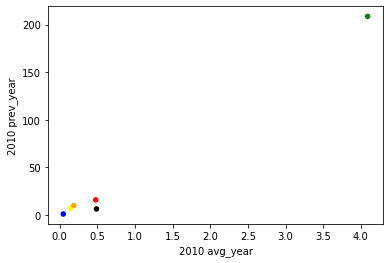

In [ ]:
scatter_data = [prev_year.iloc[:, 31], avg_year.iloc[:, 31]]
headers = ['2010 prev_year', '2010 avg_year']
scatter_data = pd.concat(scatter_data, axis=1, keys=headers)
scatter_data.plot.scatter(x='2010 avg_year', y='2010 prev_year', c=['green', 'yellow', 'orange', 'red', 'blue', 'black'])

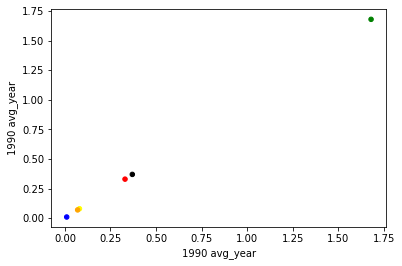

In [ ]:
scattered = [prev_year.iloc[:, 11], avg_year.iloc[:, 11]]
headers = ['1990 prev_year', '1990 avg_year']
scattered = pd.concat(scattered, axis=1, keys=headers)
scattered.plot.scatter(x='1990 avg_year', y='1990 avg_year', c=['green', 'yellow', 'orange', 'red', 'blue', 'black'])